# R 語言的五十道練習

> 資料結構：因素向量、矩陣與陣列

[數據交點](https://www.datainpoint.com) | 郭耀仁 <yaojenkuo@datainpoint.com>

In [1]:
library("jpeg")
suppressMessages(library("imager"))

## R 語言中的資料結構

- 向量（vector）
- 清單（list）
- 資料框（data.frame）
- **因素向量（factor）**
- **矩陣（matrix）**
- **陣列（array）**

## 什麼是因素向量

## 關於因素向量

因素向量是 R 語言中的特殊文字向量，主要用來處理類別資料，因素向量除了記錄文字資料以外，還會以層級記錄獨一值，並給予每個獨一值整數編碼。

## 如何創造因素向量

使用 `factor` 函數。

```r
factor(x, levels = ..., ordered = ...)
```

In [2]:
temperature_desc <- c("freezing", "cold", "cool", "warm", "hot")
temperature_desc_factor <- factor(temperature_desc)
print(class(temperature_desc))
print(class(temperature_desc_factor))

[1] "character"
[1] "factor"


In [3]:
print(temperature_desc_factor)

[1] freezing cold     cool     warm     hot     
Levels: cold cool freezing hot warm


## 如何讀取因素向量

與讀取向量的方式沒有差異，可以使用 `[index]` 或者邏輯。

In [4]:
summer_feels <- temperature_desc_factor %in% c("warm", "hot")
print(temperature_desc_factor[1:3])
print(temperature_desc_factor[summer_feels])

[1] freezing cold     cool    
Levels: cold cool freezing hot warm
[1] warm hot 
Levels: cold cool freezing hot warm


## 讀取因素向量的層級與整數編碼

- 使用 `levels` 函數。
- 使用 `as.numeric` 函數。

In [5]:
print(levels(temperature_desc_factor))
print(as.numeric(temperature_desc_factor))

[1] "cold"     "cool"     "freezing" "hot"      "warm"    
[1] 3 1 2 5 4


## 如何更新因素向量

因素向量除了文字資料值，還具有層級與整數編碼資訊，若有更新需求建議重新宣告，調整 `levels` 與 `ordered` 參數。

In [6]:
# levels = temperature_desc
temperature_desc <- c("freezing", "cold", "cool", "warm", "hot")
temperature_desc_factor <- factor(temperature_desc, levels = temperature_desc)
print(temperature_desc_factor)

[1] freezing cold     cool     warm     hot     
Levels: freezing cold cool warm hot


In [7]:
# levels = temperature_desc, ordered = TRUE
temperature_desc <- c("freezing", "cold", "cool", "warm", "hot")
temperature_desc_factor <- factor(temperature_desc, levels = temperature_desc, ordered = TRUE)
print(temperature_desc_factor)

[1] freezing cold     cool     warm     hot     
Levels: freezing < cold < cool < warm < hot


## 如何刪除因素向量

使用 `rm` 函數刪除因素向量命名

In [8]:
temperature_desc_factor <- factor(temperature_desc)
environment_objects <- ls()
print("temperature_desc_factor" %in% environment_objects)
rm(temperature_desc_factor)
environment_objects <- ls()
print("temperature_desc_factor" %in% environment_objects)

[1] TRUE
[1] FALSE


## R 為何設計因素向量？

- 因素向量具有整數的編碼。
- 不需要做額外的資料預處理，讓資料處於 modeling-ready 的狀態。

## 以 [Kaggle Titanic](https://www.kaggle.com/c/titanic) 資料集為例

In [9]:
csv_url <- paste0("https://raw.githubusercontent.com/datainpoint/classroom-rfifty/",
                  "main/07-factors-matrices-arrays/train.csv")
train <- read.csv(csv_url)
print(class(train$Survived)) # y
print(class(train$Sex))      # X

[1] "integer"
[1] "character"


In [10]:
model <- glm(Survived ~ Sex, family = binomial(logit), train)
print(summary(model))


Call:
glm(formula = Survived ~ Sex, family = binomial(logit), data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6462  -0.6471  -0.6471   0.7725   1.8256  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   1.0566     0.1290   8.191 2.58e-16 ***
Sexmale      -2.5137     0.1672 -15.036  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1186.7  on 890  degrees of freedom
Residual deviance:  917.8  on 889  degrees of freedom
AIC: 921.8

Number of Fisher Scoring iterations: 4



In [11]:
sex_factor <- factor(train$Sex)
print(sex_factor[1:5])
print(as.integer(sex_factor)[1:5])

[1] male   female female female male  
Levels: female male
[1] 2 1 1 1 2


## 什麼是矩陣

## 關於矩陣

矩陣是 R 語言中用來處理二維數值向量的資料結構，具有列（Rows）與欄（Columns）兩個維度儲存資料，一個 `m` 列 `n` 欄的矩陣外型可以被描述為 `m x n` 或者 `(m, n)`。

## 如何創造矩陣

使用 `matrix` 函數。

```r
matrix(data, nrow = ..., ncol = ...)
```

In [12]:
my_matrix <- matrix(1:6, nrow = 2)
print(class(my_matrix))
print(my_matrix)

[1] "matrix" "array" 
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6


## 如何讀取矩陣

使用 `[m, n]` 兩個索引值來搭配選擇出位於 `m` 列 `n` 欄的資料。

In [13]:
print(my_matrix[1, 3])

[1] 5


## 使用 `[m, ]` 選擇 `m` 列、`[, n]` 選擇 `n` 欄的資料

In [14]:
print(my_matrix[1, ])
print(my_matrix[, 3])

[1] 1 3 5
[1] 5 6


## 以邏輯篩選符合條件的資料

In [15]:
condition <- my_matrix > 2
print(condition)
print(my_matrix[condition])

      [,1] [,2] [,3]
[1,] FALSE TRUE TRUE
[2,] FALSE TRUE TRUE
[1] 3 4 5 6


## 如何更新矩陣

使用 `[m, n]` 更新矩陣中的資料值。

In [16]:
print(my_matrix)
my_matrix[1, 3] <- 5566
print(my_matrix)

     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
     [,1] [,2] [,3]
[1,]    1    3 5566
[2,]    2    4    6


## 如何刪除矩陣

使用 `rm` 函數刪除矩陣命名。

In [17]:
environment_objects <- ls()
print("my_matrix" %in% environment_objects)
rm(my_matrix)
environment_objects <- ls()
print("my_matrix" %in% environment_objects)

[1] TRUE
[1] FALSE


## 常見的矩陣應用

- 線性代數。
- 灰階圖片的表示。

## 線性代數：轉置矩陣

In [18]:
mat <- matrix(1:6, nrow = 2)
print(dim(mat))
t_mat <- t(mat)
print(dim(t_mat))

[1] 2 3
[1] 3 2


## 線性代數：對應元素（Element-wise）的乘積

In [19]:
mat_a <- matrix(1:6, nrow = 2)
mat_b <- matrix(1:6, nrow = 2)
print(mat_a * mat_b)

     [,1] [,2] [,3]
[1,]    1    9   25
[2,]    4   16   36


## 線性代數：矩陣乘積

In [20]:
mat_a <- matrix(1:6, nrow = 3)
mat_b <- matrix(1:6, nrow = 2)
print(mat_a %*% mat_b)

     [,1] [,2] [,3]
[1,]    9   19   29
[2,]   12   26   40
[3,]   15   33   51


## 線性代數：單位矩陣

In [21]:
identity_matrix <- diag(3)
print(identity_matrix)

     [,1] [,2] [,3]
[1,]    1    0    0
[2,]    0    1    0
[3,]    0    0    1


## 灰階圖片的表示

In [22]:
csv_url <- paste0("https://raw.githubusercontent.com/datainpoint/classroom-rfifty/",
               "main/07-factors-matrices-arrays/one_sample_of_digit_recognizer.csv")
df <- read.csv(csv_url)
n_cols <- ncol(df)
img <- as.matrix(df[1, 2:n_cols])
colnames(img) <- NULL
img_as_matrix <- matrix(img, nrow = 28, byrow = TRUE)
print(class(img_as_matrix))

[1] "matrix" "array" 


[1] 9


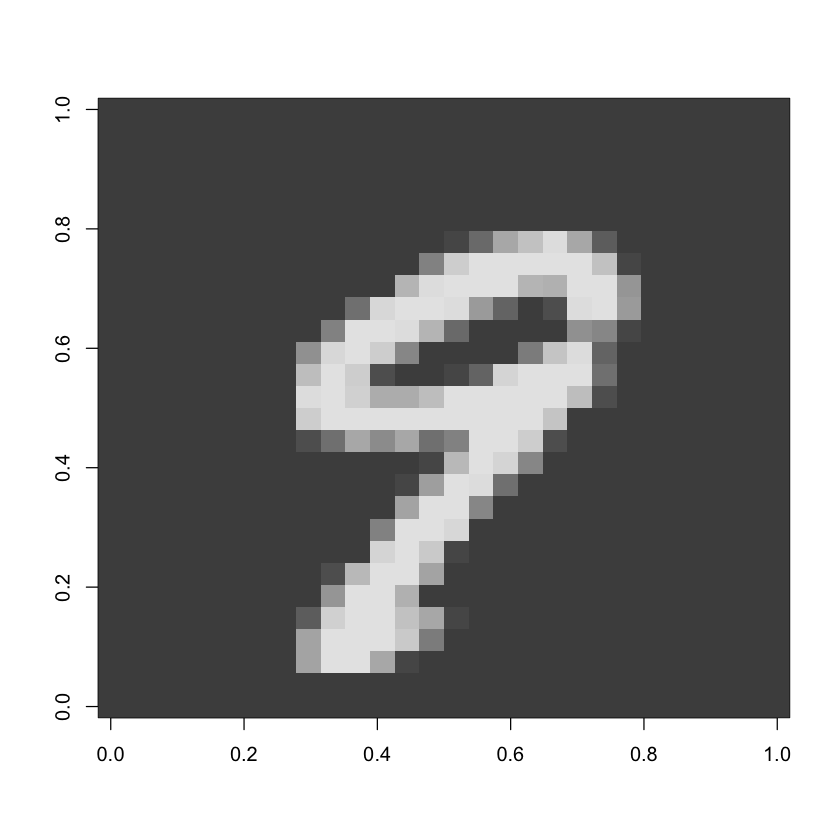

In [23]:
rotate <- function(x){
    t(apply(x, 2, rev))
}
image(rotate(img_as_matrix), col = gray.colors(33))
print(df$label)

## 什麼是陣列

## 關於陣列

陣列是 R 語言中用來處理 n 維數值向量的資料結構，具有 n 個維度儲存數值資料。

## 如何創造陣列

使用 `array` 函數。

```r
array(data, dim = ...)
```

In [24]:
my_array <- array(1:24, dim = c(4, 3, 2))
print(class(my_array))
print(my_array)

[1] "array"
, , 1

     [,1] [,2] [,3]
[1,]    1    5    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



## 如何讀取陣列

使用 n 個索引值來搭配選擇資料。

In [25]:
print(my_array[1, 3, 1])
print(my_array[1, 3, 2])

[1] 9
[1] 21


## 以邏輯篩選符合條件的資料

In [26]:
condition <- my_array %% 2 == 0
print(condition)
print(my_array[condition])

, , 1

      [,1]  [,2]  [,3]
[1,] FALSE FALSE FALSE
[2,]  TRUE  TRUE  TRUE
[3,] FALSE FALSE FALSE
[4,]  TRUE  TRUE  TRUE

, , 2

      [,1]  [,2]  [,3]
[1,] FALSE FALSE FALSE
[2,]  TRUE  TRUE  TRUE
[3,] FALSE FALSE FALSE
[4,]  TRUE  TRUE  TRUE

 [1]  2  4  6  8 10 12 14 16 18 20 22 24


## 如何更新陣列

使用 n 個索引值更新陣列中的資料值。

In [27]:
my_array[1, 2, 1] <- 5566
print(my_array)

, , 1

     [,1] [,2] [,3]
[1,]    1 5566    9
[2,]    2    6   10
[3,]    3    7   11
[4,]    4    8   12

, , 2

     [,1] [,2] [,3]
[1,]   13   17   21
[2,]   14   18   22
[3,]   15   19   23
[4,]   16   20   24



## 如何刪除陣列

使用 `rm()` 函數刪除陣列命名。

In [28]:
environment_objects <- ls()
print("my_array" %in% environment_objects)
rm(my_array)
environment_objects <- ls()
print("my_array" %in% environment_objects)

[1] TRUE
[1] FALSE


## 常見的陣列應用

一般圖片的表示。

In [29]:
jpg_url <- "https://i.imgur.com/hTFmWKO.jpg"
download.file(jpg_url, destfile = "cute_schnauzer.jpg", mode="wb")
img <- load.image("cute_schnauzer.jpg")
print(class(img))
print(dim(img)) # Width(pix)/Height(pix)/Depth/Colour channels

[1] "cimg"         "imager_array" "numeric"     
[1] 344 459   1   3


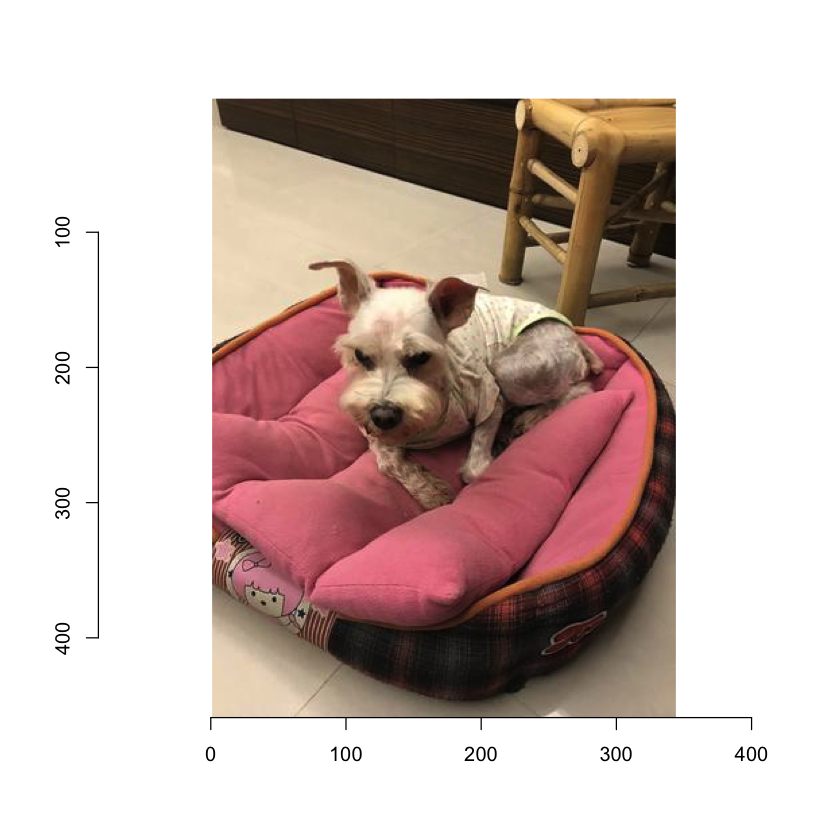

In [30]:
plot(img)

## 重點統整

- 因素向量是 R 語言中的特殊文字向量，主要用來處理類別資料。
- 矩陣是 R 語言中用來處理二維數值向量的資料結構。
- 陣列是 R 語言中用來處理 n 維數值向量的資料結構。

## 重點統整（續）

- 以 `factor()` 函數創造因素向量。
- 以 `matrix()` 函數創造矩陣。
- 以 `array()` 函數創造陣列。

## 重點統整（續）

- 因素向量具有整數的編碼，讓資料處於 modeling-ready 的狀態。
- 常見的矩陣應用有線性代數與灰階圖片的表示。
- 常見的陣列應用有一般圖片的表示。